In [1]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
continuous = ['age', 'fnlwgt', 'educational-num', 'log-capital-gain', 'log-capital-loss', 'hours-per-week']
target = "income"

In [10]:
def add_features(df):
  df['log-capital-gain'] = np.log(df['capital-gain'] + 1)
  df['log-capital-loss'] = np.log(df['capital-loss'] + 1)
  for column in categorical:
    df[column] = pd.Categorical(df[column])
  df['income'] = (df['income'] == ">50K")
  return

add_features(df)

In [11]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,False,0.000000,0.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,False,0.000000,0.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,True,0.000000,0.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,True,8.947546,0.0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,False,0.000000,0.0


In [12]:
df.race

0        Black
1        White
2        White
3        Black
4        White
         ...  
48837    White
48838    White
48839    White
48840    White
48841    White
Name: race, Length: 48842, dtype: category
Categories (5, object): ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']


### .cat: This is an accessor in pandas for categorical data. It allows you to perform operations specific to categorical data on a Series.

### .codes: This attribute is used to get the category codes of each element in a categorical column. It returns a new Series of integers representing the codes of the categories.


In [15]:
df.race.cat.codes.head()

0    2
1    4
2    4
3    2
4    4
dtype: int8

In [13]:
df['income'] = df['income'].astype(int)

In [14]:
df.income

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split


train_df, valid_df = train_test_split(df, test_size=0.2,random_state=42)
train_df[categorical] = train_df[categorical].apply(lambda x: x.cat.codes)
valid_df[categorical] = valid_df[categorical].apply(lambda x: x.cat.codes)

In [17]:
train_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss
37193,42,4,145175,15,10,2,7,0,4,1,0,0,40,39,0,0.0,0.0
31093,52,6,175029,0,6,2,3,0,4,1,0,0,35,39,0,0.0,0.0
33814,34,2,172664,11,9,2,3,0,4,1,0,0,40,39,0,0.0,0.0
14500,28,4,125791,11,9,4,1,1,4,0,0,0,40,39,0,0.0,0.0
23399,46,4,28419,8,11,4,14,1,4,1,0,0,50,39,0,0.0,0.0


In [18]:
valid_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss
7762,56,4,33115,11,9,0,8,4,4,0,0,0,40,39,0,0.000000,0.0
23881,25,4,112847,11,9,2,14,3,3,1,0,0,40,39,0,0.000000,0.0
30507,43,4,170525,9,13,0,10,1,4,0,14344,0,40,39,1,9.571157,0.0
28911,32,4,186788,11,9,2,14,0,4,1,0,0,40,39,0,0.000000,0.0
19484,39,4,277886,9,13,2,12,5,4,0,0,0,30,39,0,0.000000,0.0


# Binary Splits

In [19]:
df.gender.head()

0      Male
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: category
Categories (2, object): ['Female', 'Male']

In [20]:
valid_df.gender.head()

7762     0
23881    1
30507    0
28911    1
19484    0
Name: gender, dtype: int8

In [22]:
preds = (valid_df.gender == 1)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(valid_df.income, preds)

0.5002559115569659

In [23]:
preds = valid_df.workclass == 4
from sklearn.metrics import mean_absolute_error
mean_absolute_error(valid_df.income, preds)

0.6283140546627086

In [24]:
df.race.head()

0    Black
1    White
2    White
3    Black
4    White
Name: race, dtype: category
Categories (5, object): ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [25]:
valid_df.race.head()

7762     4
23881    3
30507    4
28911    4
19484    4
Name: race, dtype: int8

# Decision Tree Intuition

In [26]:
preds = []
for idx, row in valid_df.iterrows():
  gender = row['gender']
  race = row['race']
  if race == 4 and gender == 1:
    preds.append(1)
  else:
    preds.append(0)

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(valid_df.income, preds)

0.44999488176886066

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model = DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(train_df[categorical+continuous], train_df[target])

DecisionTreeClassifier(max_leaf_nodes=5)

In [30]:
import graphviz, re

def draw_tree(model, df, size=10, ratio=0.6, precision=2, **kwargs):

  viz = export_graphviz(model, feature_names=df.columns, filled=True, rounded=True,
                        special_characters=True, precision=precision, **kwargs)
  return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', viz))

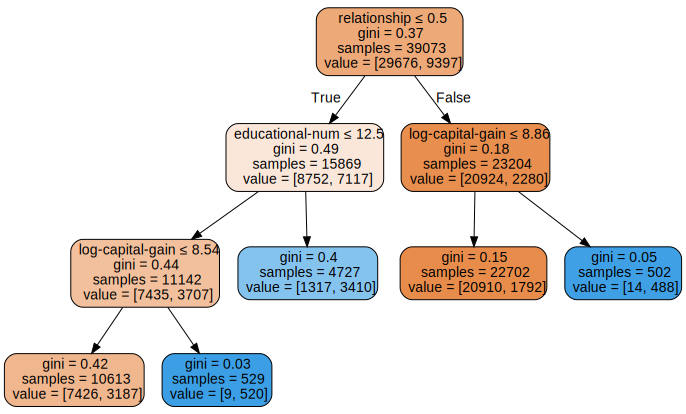

In [31]:
draw_tree(model, train_df[categorical+continuous])

In [32]:
preds = model.predict(valid_df[categorical+continuous])
mean_absolute_error(valid_df.income, preds)

0.15508240352134303

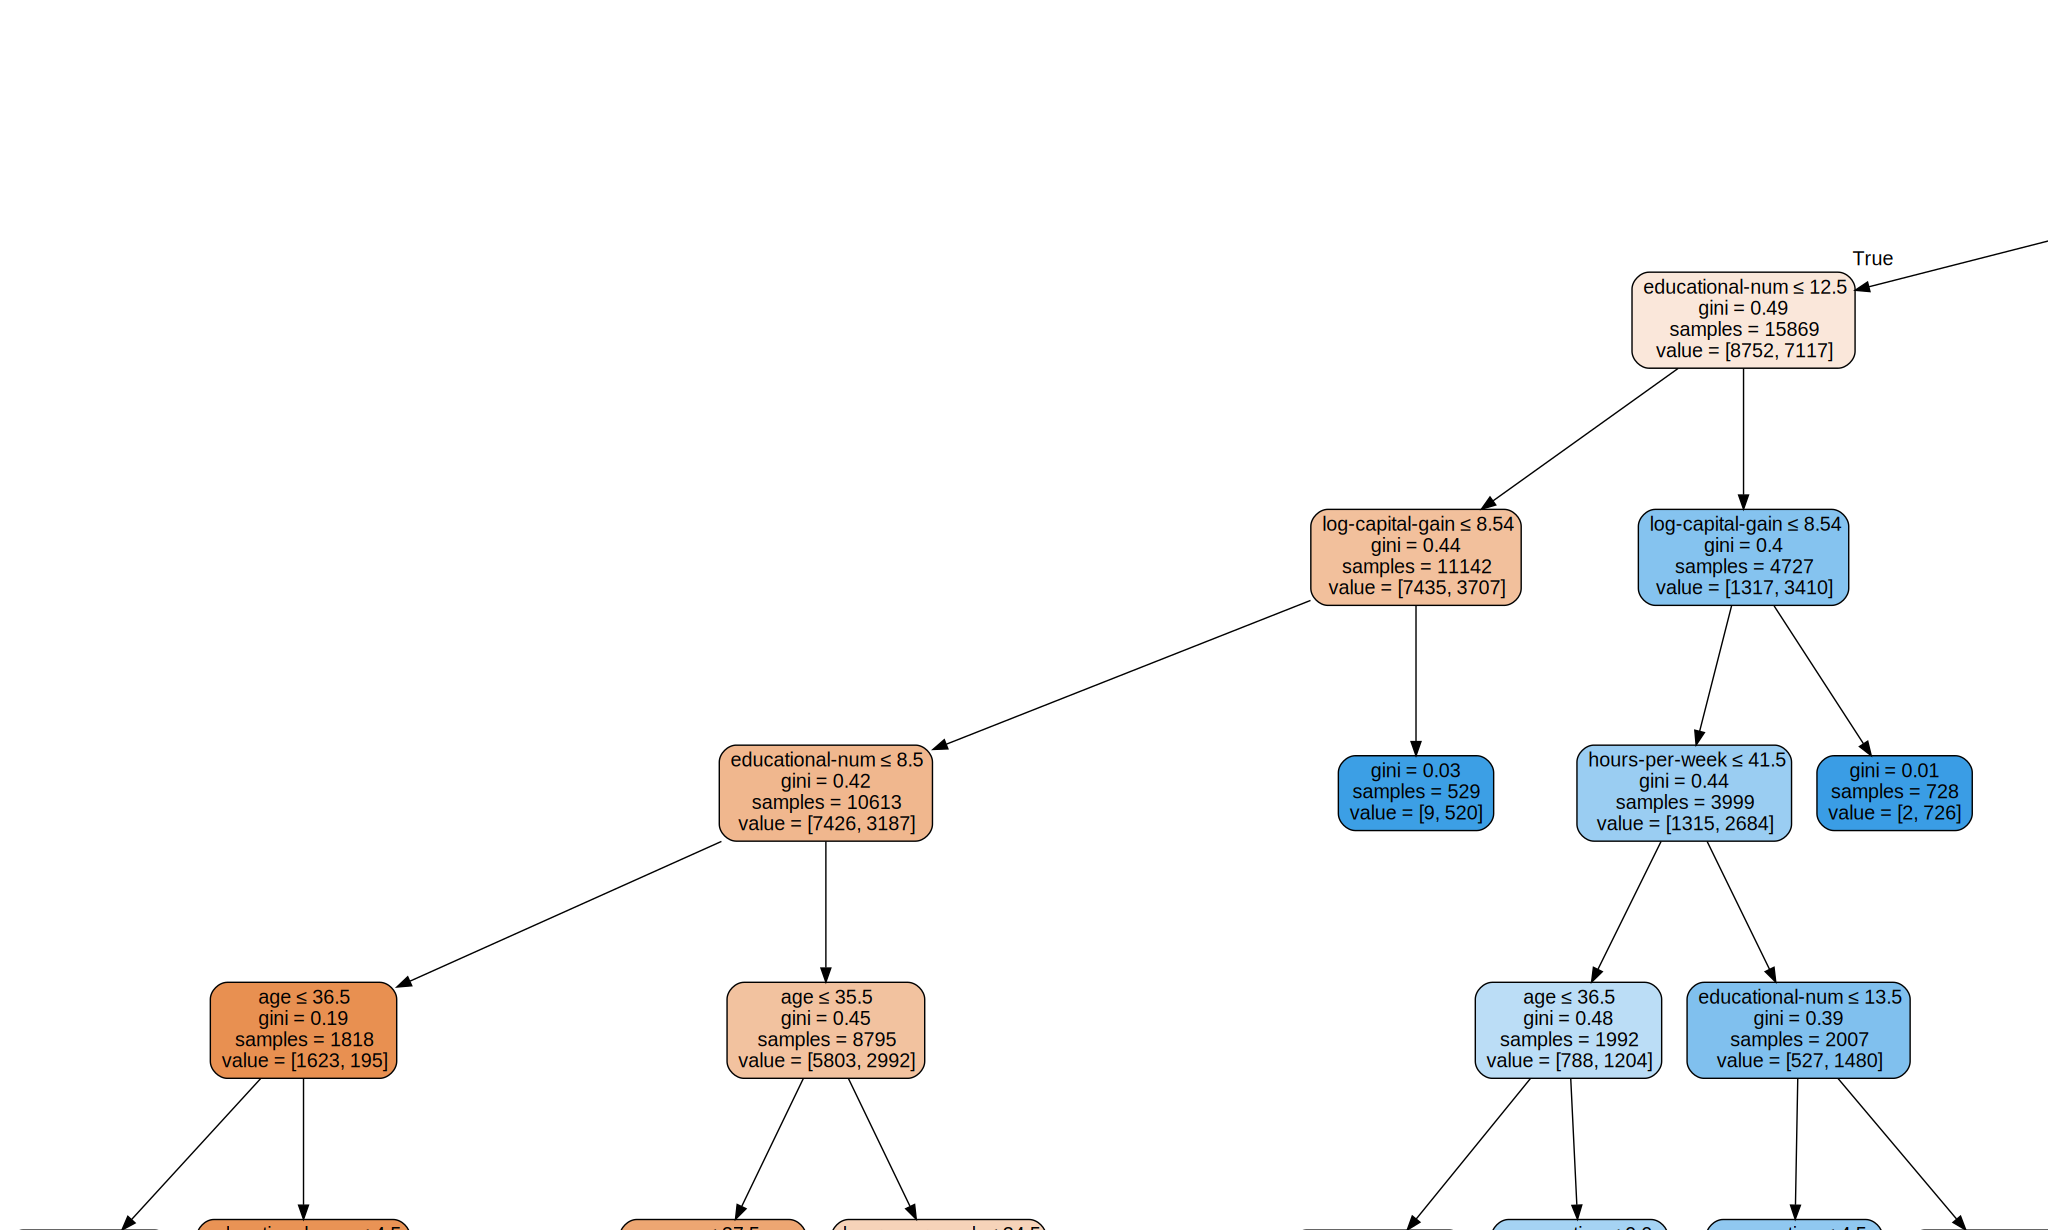

In [36]:
model = DecisionTreeClassifier(min_samples_leaf=500)
model.fit(train_df[categorical+continuous], train_df[target])
draw_tree(model, train_df[categorical+continuous], size=30)

In [37]:
preds = model.predict(valid_df[categorical+continuous])
mean_absolute_error(valid_df.income, preds)

0.14474357661992016

# random forest

In [38]:
def build_tree(df, proportion = 0.8):
  total = df.shape[0]
  indices = np.random.choice(total, int(total * proportion))
  return DecisionTreeClassifier(min_samples_leaf=50).fit(df[categorical+continuous].iloc[indices], df[target].iloc[indices])

In [39]:
random_decision_trees = [build_tree(train_df) for idx in range(500)]

In [40]:
all_probs = [dtc_model.predict(valid_df[categorical+continuous]) for dtc_model in random_decision_trees]
avg_probs = np.stack(all_probs).mean(0)
mean_absolute_error(valid_df.income, avg_probs)

0.14443525437608762

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(500, min_samples_leaf=50)
rf.fit(train_df[categorical+continuous], train_df[target])

RandomForestClassifier(min_samples_leaf=50, n_estimators=500)

In [42]:
preds = rf.predict(valid_df[categorical+continuous])
mean_absolute_error(valid_df.income, preds)

0.13532603132357457

<Axes: ylabel='cols'>

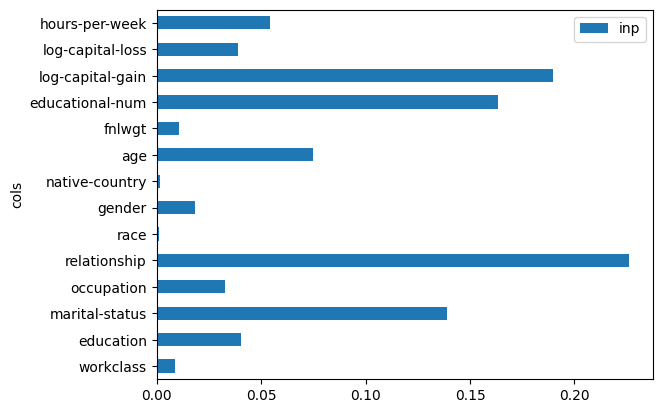

In [43]:
pd.DataFrame(dict(cols=categorical+continuous, inp=rf.feature_importances_)).plot('cols', 'inp', 'barh')

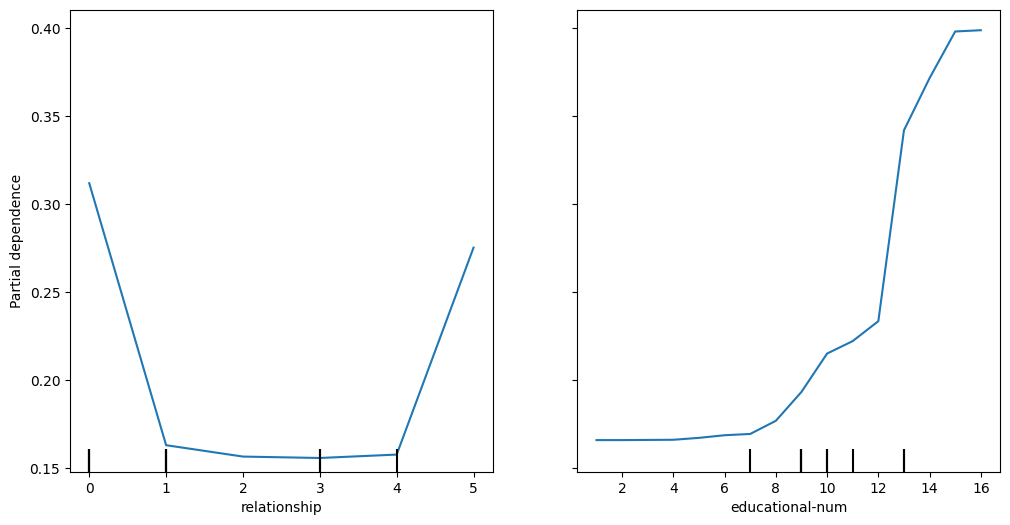

In [44]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fix, axs = plt.subplots(figsize=(12,6))
PartialDependenceDisplay.from_estimator(rf, valid_df[categorical+continuous], ['relationship', 'educational-num'], ax=axs);